### Variate Autoregression Model

In [1]:

import pandas as pd
from statsmodels.tsa.api import VAR
import os
from dotenv import load_dotenv
import yfinance as yf
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
# Load environment variables from the .env file
load_dotenv('../.env');

# Data Viz. 
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter
from calendar import monthrange
from calendar import month_name
from calendar import monthrange, month_name
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': 'white', 'grid.color': '.8'}
)
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'
cmaps_hex = ['#193251','#FF5A36','#696969', '#7589A2','#FF5A36', '#DB6668']
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

from sklearn.preprocessing import StandardScaler


import numpy as np

In [2]:
# Pulling the S&P 500 list from Wiki
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# We want the symbols
sp500_symbols = tickers['Symbol'].tolist()

# And the company name
sp500_names = tickers['Security'].tolist()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

# For time stamps
from datetime import datetime

# Define start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create an empty list to store DataFrames for each stock
company_list = []

# Download data for each stock and add a 'company_name' column
for stock, com_name in zip(sp500_symbols, sp500_names):
    df = yf.download(stock, start, end)
    df['company_name'] = com_name
    company_list.append(df)

# Concatenate the list of DataFrames into a single DataFrame
df = pd.concat(company_list, axis=0)

df.tail(100)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-12-19 00:00:00 -> 2023-12-19 16:29:20.065554)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

C:\Users\chris\AppData\Local\Temp\ipykernel_34352\3368134996.py:39: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = pd.concat(company_list, axis=0)


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-31,189.179993,190.089996,186.440002,188.089996,187.640732,1500800.0,Zoetis
2023-08-01,187.460007,188.770004,184.789993,185.509995,185.066895,1535300.0,Zoetis
2023-08-02,184.229996,185.869995,181.660004,182.000000,181.565292,2284800.0,Zoetis
2023-08-03,180.610001,183.259995,179.759995,180.880005,180.447968,1688000.0,Zoetis
2023-08-04,180.139999,182.460007,178.339996,178.630005,178.203339,1827500.0,Zoetis
...,...,...,...,...,...,...,...
2023-12-13,191.779999,197.669998,190.940002,197.410004,197.410004,2104700.0,Zoetis
2023-12-14,198.000000,201.919998,198.000000,200.089996,200.089996,3044400.0,Zoetis
2023-12-15,199.410004,199.410004,193.970001,196.289993,196.289993,4058300.0,Zoetis


In [3]:
import pandas as pd
df = df.assign(
    timestamp=pd.to_datetime(df.index), 
    date=df.index.date,
    year=df.index.year,
    month=df.index.month,
    day=df.index.day,
    dayofyear=df.index.dayofyear,
)

print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-19  121.330002  123.769997  121.160004  122.129997  115.167542   
2022-12-20  121.989998  122.330002  120.699997  120.809998  113.922791   
2022-12-21  121.830002  123.839996  121.510002  123.459999  116.421722   
2022-12-22  122.220001  122.500000  119.199997  121.589996  114.658325   
2022-12-23  120.790001  121.000000  117.800003  120.139999  113.290993   
...                ...         ...         ...         ...         ...   
2023-12-13  191.779999  197.669998  190.940002  197.410004  197.410004   
2023-12-14  198.000000  201.919998  198.000000  200.089996  200.089996   
2023-12-15  199.410004  199.410004  193.970001  196.289993  196.289993   
2023-12-18  197.809998  198.139999  195.600006  196.720001  196.720001   
2023-12-19  197.779999  198.690002  197.320007  198.087494  198.087494   

               Volume company_name  t

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,timestamp,year,month,day,dayofyear
count,125961.000000,125961.000000,125961.000000,125961.000000,125961.000000,1.259610e+05,125961,125961.000000,125961.000000,125961.000000,125961.000000
mean,178.388349,180.340258,176.536839,178.505682,177.290277,4.810934e+06,2023-06-20 21:02:17.271059968,2022.964346,6.583474,15.872357,184.890260
min,7.710000,7.900000,7.530000,7.670000,7.670000,0.000000e+00,2022-12-19 00:00:00,2022.000000,1.000000,1.000000,3.000000
25%,59.009998,59.660000,58.360001,58.980000,58.196449,9.608000e+05,2023-03-22 00:00:00,2023.000000,4.000000,8.000000,94.000000
50%,106.529999,107.709999,105.389999,106.589996,105.414925,1.960300e+06,2023-06-22 00:00:00,2023.000000,7.000000,16.000000,187.000000
75%,202.089996,204.309998,199.960007,202.210007,200.953445,4.352200e+06,2023-09-21 00:00:00,2023.000000,10.000000,23.000000,277.000000
max,6896.669922,6997.069824,6870.000000,6934.399902,6934.399902,3.723413e+08,2023-12-19 00:00:00,2023.000000,12.000000,31.000000,364.000000
std,341.376943,345.134905,338.124363,341.717904,341.536934,1.092032e+07,NaN,0.185426,3.441680,8.751623,105.164313


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,timestamp,date,year,month,day,dayofyear
Date,,,,,,,,,,,,,
2022-12-19,121.330002,123.769997,121.160004,122.129997,115.167542,2440100.0,3M,2022-12-19,2022-12-19,2022,12,19,353
2022-12-20,121.989998,122.330002,120.699997,120.809998,113.922791,2903000.0,3M,2022-12-20,2022-12-20,2022,12,20,354
2022-12-21,121.830002,123.839996,121.510002,123.459999,116.421722,2578100.0,3M,2022-12-21,2022-12-21,2022,12,21,355
2022-12-22,122.220001,122.500000,119.199997,121.589996,114.658325,2188400.0,3M,2022-12-22,2022-12-22,2022,12,22,356
2022-12-23,120.790001,121.000000,117.800003,120.139999,113.290993,2609300.0,3M,2022-12-23,2022-12-23,2022,12,23,357


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125961 entries, 2022-12-19 to 2023-12-19
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Open          125961 non-null  float64       
 1   High          125961 non-null  float64       
 2   Low           125961 non-null  float64       
 3   Close         125961 non-null  float64       
 4   Adj Close     125961 non-null  float64       
 5   Volume        125961 non-null  float64       
 6   company_name  125961 non-null  object        
 7   timestamp     125961 non-null  datetime64[ns]
 8   date          125961 non-null  object        
 9   year          125961 non-null  int32         
 10  month         125961 non-null  int32         
 11  day           125961 non-null  int32         
 12  dayofyear     125961 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(4), object(2)
memory usage: 11.5+ MB


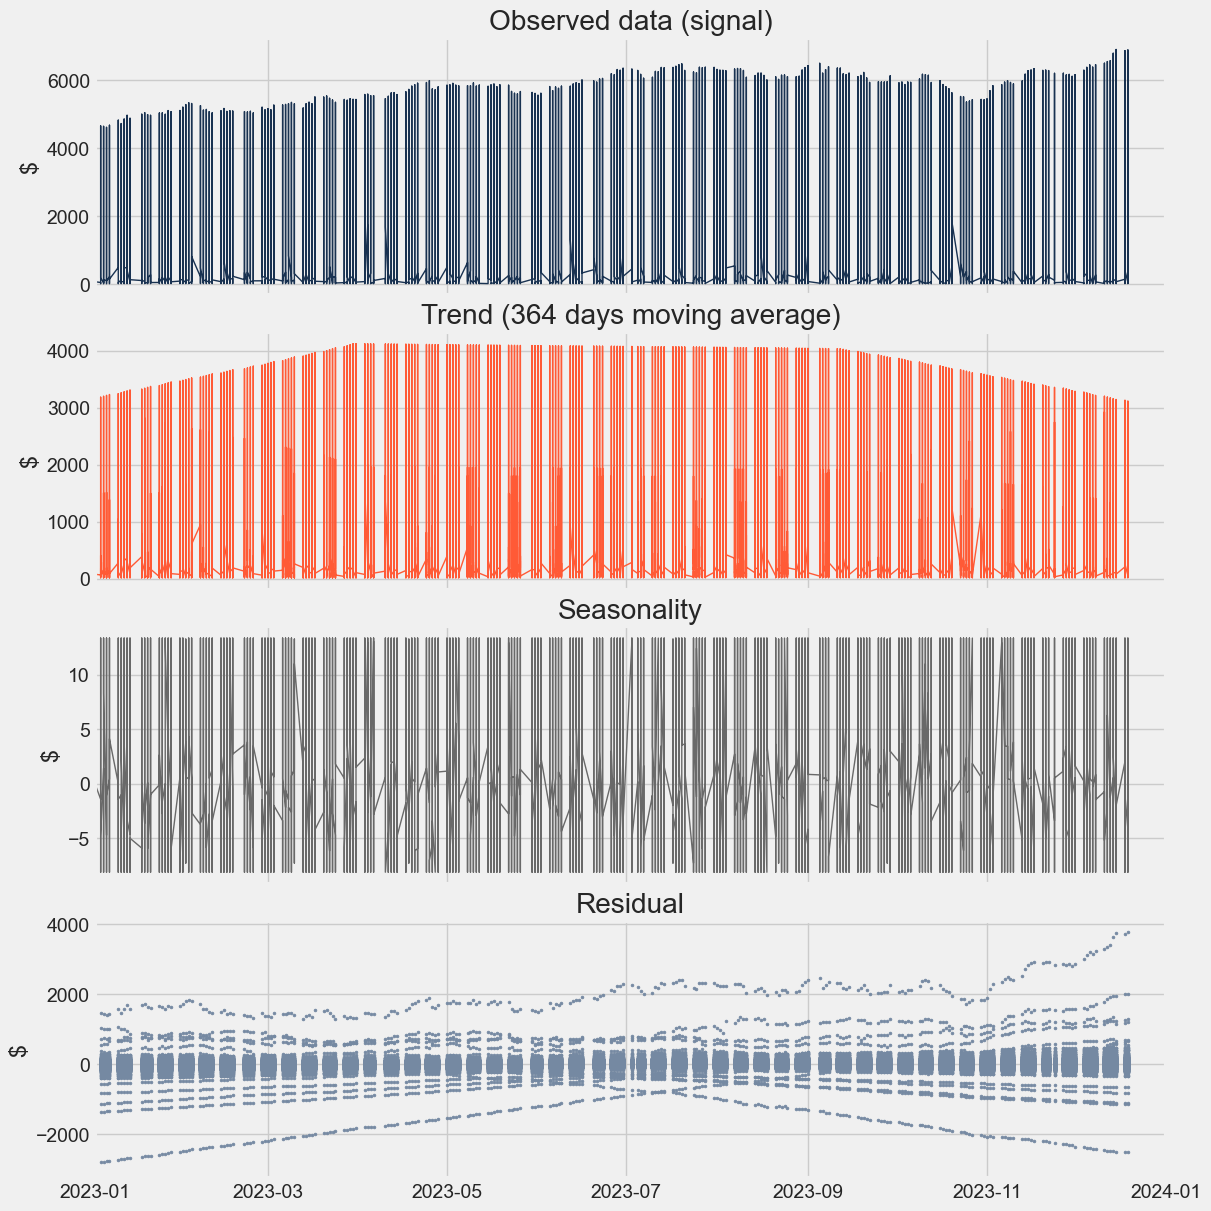

In [7]:
# We use the parameter `period` = 365 to extract the yearly seasonality. 
seas_decomp_yearly = seasonal_decompose(
    x=df['Open'], 
    model='additive', 
    two_sided=True,
    period= 365)

# Plots:
fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)

#Plot Signal
ax[0].set(title='Observed data (signal)', 
          ylabel="$")
seas_decomp_yearly.observed.plot(color=sns_c[0], 
                              linewidth=1,
                              sharex=True,
                              ax=ax[0])
#Plot Trend
ax[1].set(title='Trend (364 days moving average)', 
          ylabel="$")
seas_decomp_yearly.trend.plot(color=sns_c[1], 
                              linewidth=1,
                              sharex=True,
                              ax=ax[1])
#Plot Seasonality
ax[2].set(title='Seasonality', 
          ylabel="$")
seas_decomp_yearly.seasonal.plot(
                                color=sns_c[2], 
                                linewidth=1,
                                sharex=True,
                                ax=ax[2])
#Plot residual
ax[3].set(title='Residual', 
          ylabel="$");
ax[3].scatter(
    x=seas_decomp_yearly.resid.index,
    y=seas_decomp_yearly.resid,
    color=sns_c[3],
    s=4)

for i in range(4):
    ax[i].set_xlim(pd.to_datetime("2023"),pd.to_datetime("2024"))
    
fig.savefig("../VRA.III.png",dpi=300)

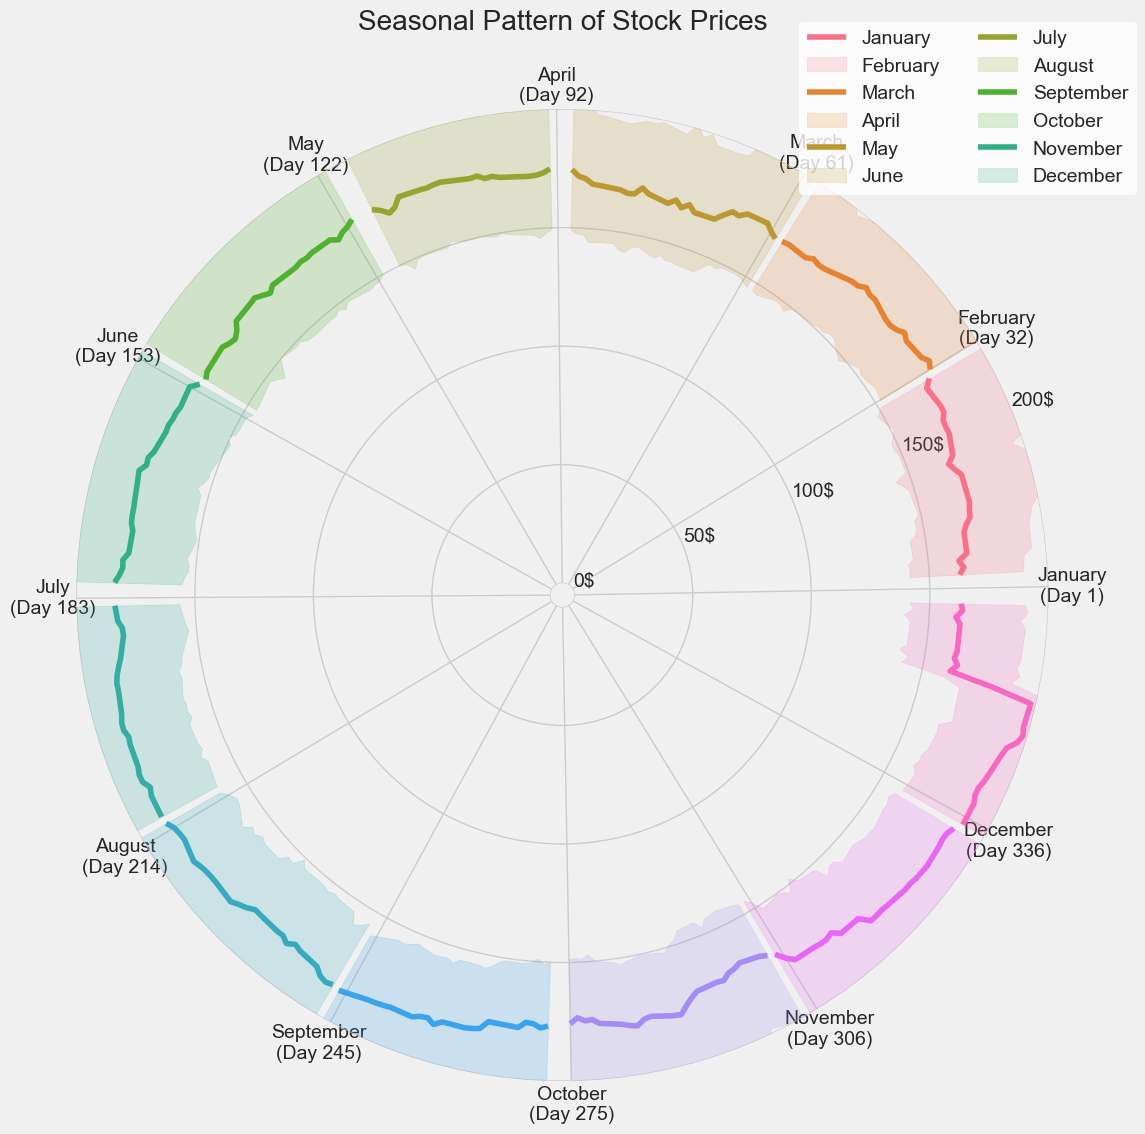

AttributeError: 'PolarAxes' object has no attribute 'savefig'

In [10]:
# Polar plot for seasonality 
ax = plt.subplot(111, projection='polar')

# Convert and plot data
df \
    .assign(day_of_year_cyclic=lambda x: 2 * np.pi * x.index.dayofyear / 365.25) \
    .pipe((sns.lineplot, 'data'), 
          x='day_of_year_cyclic', 
          y='Adj Close', 
          hue='month',
          palette=sns.color_palette("husl", 12),
          ax=ax)
          
# Make the plot more beautiful
days_per_month=[0] + [monthrange(2020, i)[1] for i in range(1,12)]      #findout how many days each month has ()
month_start=np.cumsum(days_per_month) +1                                #add 1 to start at 0 instead of 0, take the cumsum to get ech months starting day
month_start_theta=[i *2 * np.pi / 365.25 for i in month_start]
month_label=[month_name[i] for i in range(1,13)]
month_label_long=[label+'\n(Day ' +str(month_start[ind]) +')' for ind,label in enumerate(month_label)]



days_per_month = [0] + [monthrange(2020, i)[1] for i in range(1, 13)]
month_start = np.cumsum(days_per_month) + 1
month_start_theta = [i * 2 * np.pi / 365.25 for i in month_start]

# Use the same number of tick locations and labels
ax.set_title('Seasonal Pattern of Stock Prices', va='bottom', pad=22)
ax.spines.clear()

ax.set_xlabel('')
ax.set_xticks(month_start_theta[:-1])  # Use all locations except the last one
ax.set_xticklabels(month_label_long)

ax.set_ylabel('')
ax.set_ylim(0, 200)
ax.set_yticks(yt := [0,50, 100, 150, 200])
ax.set_yticklabels([str(t) + '$' for t in yt], rotation=45)



# Arrows / Annotations
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="dimgrey")

# Update arrow positions based on your data range
arrow_pos1 = (1 * np.pi / 180, 1000)
arrow_pos2 = (25 * np.pi / 180, 1000)

a1 = patches.FancyArrowPatch(arrow_pos1, (1 * np.pi / 180, 2000), **kw)
a2 = patches.FancyArrowPatch(arrow_pos2, (25 * np.pi / 180, 2000), connectionstyle=f"arc3,rad={0.105}", **kw)

ax.add_patch(a1)
ax.add_patch(a2)


ax.set_rorigin(-5)
ax.xaxis.set_tick_params(which='major', pad=10)

ax.legend(labels=month_label, ncol=2, facecolor='white', edgecolor='white', bbox_to_anchor=(1.1, 1.1), loc=1)

ax.figure.set_figwidth(12)
ax.figure.set_figheight(12)

plt.show()

ax.savefig("../var_II.1.png")


In [ ]:

# Get the list of tickers for the S&P 500

# Pulling the S&P 500 list from Wiki
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# We want the symbols
sp500_tickers = tickers['Symbol'].tolist()

In [ ]:
# Download historical data for each stock
stock_data = yf.download(sp500_tickers, start='2005-01-01', end='2023-01-01', progress=False)

# Extract the closing prices and create a new DataFrame
closing_prices = stock_data['Adj Close']

# Create a MultiIndex with dates and tickers
closing_prices.columns = pd.MultiIndex.from_product([closing_prices.columns, ['Close']])

# Display the resulting DataFrame
closing_prices.head()

In [ ]:
# Plot yearly seasonality
fig, ax = plt.subplots() 

pd.pivot_table(data=df[['year', 'dayofyear', 'Close']], index='Date', columns='year') \
    ['Close'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='EL Evoluthion de los SP 500os', ylabel="$");

fig.savefig("../var_II.2.png",dpi=300)

In [ ]:
closing_prices.info()

In [ ]:
closing_prices.describe()

In [ ]:
closing_prices.columns

In [ ]:
closing_prices.columns = closing_prices.columns.map(lambda x: x[0])

In [ ]:
closing_prices.head()

In [ ]:
closing_prices.columns

In [ ]:
column_names_list = list(closing_prices.columns)

In [ ]:
column_names_list 

In [ ]:
closing_prices.columns

In [ ]:
scaler = StandardScaler()
closing_prices_scaled = scaler.fit_transform(closing_prices)

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR

# Assuming closing_prices is your DataFrame with stock prices
model = VAR(closing_prices)
# results = model.fit()

# Get the lag order
# lag_order = results.k_ar

## Make predictions
# predictions = results.forecast(closing_prices.values[-lag_order:], steps=your_steps)

# # Create a DataFrame with the predicted values
# predictions_df = pd.DataFrame(predictions, columns=closing_prices.columns)

# # Generate a date range for the forecast period
# forecast_dates = pd.date_range(start=closing_prices.index[-1] + pd.Timedelta(days=1), periods=10)

# # Set the index of the predictions DataFrame
# predictions_df.index = forecast_dates

# # Display the predictions DataFrame
# print(predictions_df)

In [ ]:
closing_prices.isna().sum().sum()

In [ ]:
closing_prices.interpolate(axis=1, method='linear', inplace=True)

In [ ]:
closing_prices.isna().sum().sum()

In [ ]:
# Assuming closing_prices is your DataFrame with stock prices
model = VAR(closing_prices)
results = model.fit()

# Get the lag order
lag_order = results.k_ar

## Make predictions
predictions = results.forecast(closing_prices.values[-lag_order:], steps=30)

# # Create a DataFrame with the predicted values
predictions_df = pd.DataFrame(predictions, columns=closing_prices.columns)

# # Generate a date range for the forecast period
forecast_dates = pd.date_range(start=closing_prices.index[-1] + pd.Timedelta(days=1), periods=30)

# # Set the index of the predictions DataFrame
predictions_df.index = forecast_dates

# # Display the predictions DataFrame
print(predictions_df)

In [ ]:
import matplotlib.pyplot as plt

# Assuming predictions_df is your DataFrame with predictions
predictions_df.plot(figsize=(10, 6))
plt.title('VAR Model Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Variable Values')
plt.legend(loc='upper right')
plt.show()